In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_auc(x, y):
    """
    Calcola l'area sotto la curva (AUC) utilizzando il metodo del trapezio.

    :param x: Valori dell'asse x (frazione dei pixel/frame inseriti).
    :param y: Valori dell'asse y (errori calcolati).
    :return: Area sotto la curva.
    """
    return np.trapz(y, x)

def plot_combined_curves(all_errors_insertion, all_errors_deletion, title="", save_path=""):
    # Creazione della figura e dei due subplot (1 riga, 2 colonne)
    fig, axs = plt.subplots(1, 2, figsize=(11, 5))

    # # Plot per la curva di inserimento
    # max_len_insertion = max(map(len, all_errors_insertion))
    # padded_array_insertion = np.full((len(all_errors_insertion), max_len_insertion), np.nan)
    # for i, row in enumerate(all_errors_insertion):
    #     padded_array_insertion[i, :len(row)] = row  # Riempie solo le parti esistenti
    # mean_errors_for_insertion_vott = np.nanmean(padded_array_insertion, axis=0)
    mean_errors_for_insertion_vott = np.nanmean(all_errors_insertion, axis=0)

    #x_insertion = np.arange(0, mean_errors_for_insertion_vott.shape[0])
    x_insertion = np.linspace(0, 1, mean_errors_for_insertion_vott.shape[0])
    auc_insertion = calculate_auc(x_insertion, mean_errors_for_insertion_vott)
    auc_text_insertion = f'AUC = {auc_insertion:.2f}'
    axs[0].plot(x_insertion, mean_errors_for_insertion_vott, label=f'Error Curve, {auc_text_insertion}')
    #axs[0].scatter(x_insertion, mean_errors_for_insertion_vott, color='blue', zorder=3)


    axs[0].fill_between(x_insertion, mean_errors_for_insertion_vott, color='skyblue', alpha=0.4)
    axs[0].set_xlabel('Fraction of pixels inserted')
    axs[0].set_ylabel('Mean Squared Error')
    axs[0].grid(True, linestyle='--', alpha=0.6)
    axs[0].set_title('Mean Insertion Metric Curve')
    axs[0].legend()

    # # Plot per la curva di cancellazione
    # max_len_deletion = max(map(len, all_errors_deletion))
    # padded_array_deletion = np.full((len(all_errors_deletion), max_len_deletion), np.nan)
    # for i, row in enumerate(all_errors_deletion):
    #     padded_array_deletion[i, :len(row)] = row  # Riempie solo le parti esistenti
    # mean_errors_for_deletion_vott = np.nanmean(padded_array_deletion, axis=0)
    mean_errors_for_deletion_vott = np.nanmean(all_errors_deletion, axis=0)

    #x_deletion = np.arange(0, mean_errors_for_deletion_vott.shape[0])
    x_deletion = np.linspace(0, 1, mean_errors_for_deletion_vott.shape[0])
    auc_deletion = calculate_auc(x_deletion, mean_errors_for_deletion_vott)
    auc_text_deletion = f'AUC = {auc_deletion:.2f}'

    axs[1].plot(x_deletion, mean_errors_for_deletion_vott, label=f'Error Curve, {auc_text_deletion}')
    #axs[1].scatter(x_deletion, mean_errors_for_deletion_vott, color='red', zorder=3)
    axs[1].fill_between(x_deletion, mean_errors_for_deletion_vott, color='lightcoral', alpha=0.4)
    axs[1].set_xlabel('Fraction of pixels removed')
    axs[1].set_ylabel('Mean Squared Error')
    axs[1].grid(True, linestyle='--', alpha=0.6)
    axs[1].set_title('Deletion Mean Metric Curve')
    axs[1].legend()

    # Aggiungi il titolo globale
    plt.suptitle(title, fontsize=16)
    # Mostra i plot
    plt.tight_layout()

    # Salva la figura con DPI 400
    #plt.tight_layout()
    #plt.subplots_adjust(top=0.85)  # Per evitare che il titolo si sovrapponga ai grafici
    #plt.savefig(save_path, dpi=400)

    plt.show()

    return mean_errors_for_insertion_vott,mean_errors_for_deletion_vott,auc_insertion, auc_deletion

import matplotlib.pyplot as plt
import numpy as np

def plot_curves_with_stats(curves, title='Curva Media e Deviazione Standard', color='blue'):
    """
    Plotta più curve con la curva media tratteggiata e la banda della deviazione standard.
    
    Args:
        curves (list or np.array): Matrice (n_curves, n_points) contenente le curve.
        title (str): Titolo del grafico.
        color (str): Colore principale per la curva media e la banda della dev. standard.
    """
    # Converti le curve in array numpy
    curves = np.array(curves)
    
    # Asse x basato sul numero di punti delle curve
    x = np.linspace(0, curves.shape[1] - 1, curves.shape[1])
    
    # Calcolo della media e della deviazione standard punto per punto
    mean_curve = np.mean(curves, axis=0)
    std_curve = np.std(curves, axis=0)
    
    # Plot delle curve individuali
    plt.figure(figsize=(10, 6))
    for curve in curves:
        plt.plot(x, curve, color='skyblue', alpha=0.5)
    
    # Aggiunta della curva media tratteggiata
    plt.plot(x, mean_curve, color=color, linestyle='--', linewidth=2, label='Media')
    
    # Aggiunta della banda della deviazione standard
    plt.fill_between(x, mean_curve - std_curve, mean_curve + std_curve, color=color, alpha=0.2, label='±1 Dev. Std.')
    
    # Testo con la deviazione standard media
    plt.text(x[len(x) // 2], np.max(mean_curve) + 0.35, f'Dev. Std. Media: {np.mean(std_curve):.2f}', fontsize=10)
    
    # Personalizzazione del grafico
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Mostra il plot
    plt.show()



In [4]:
import numpy as np

M = 10 # Numero di seed casuali da generare
seed_values = np.random.choice(100, M, replace=False)

seed_values

array([55, 89, 97, 32, 19, 52, 40, 66, 58, 81])

In [2]:
import pickle

algs = ["diff_pred", "exp_kern", "inv_sigmoide"]

results_stability_temporal = []

for alg in algs:
  path_to_load_results = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/results/new_rise_multiplicative_norm_zero/stability_rise_temporal_l12_p0.6_N1000_M10_{alg}.pkl"
  # Load della lista results
  with open(path_to_load_results, 'rb') as file:
    print(alg)
    result_stability_rise_spatial = pickle.load(file)
    results_stability_temporal.append(result_stability_rise_spatial)

diff_pred
exp_kern
inv_sigmoide


#### Diff_Pred

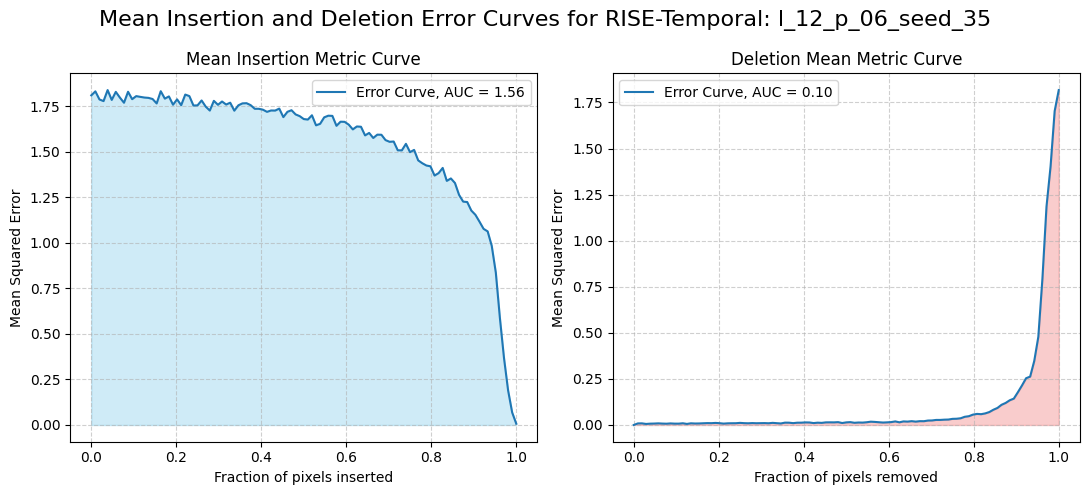

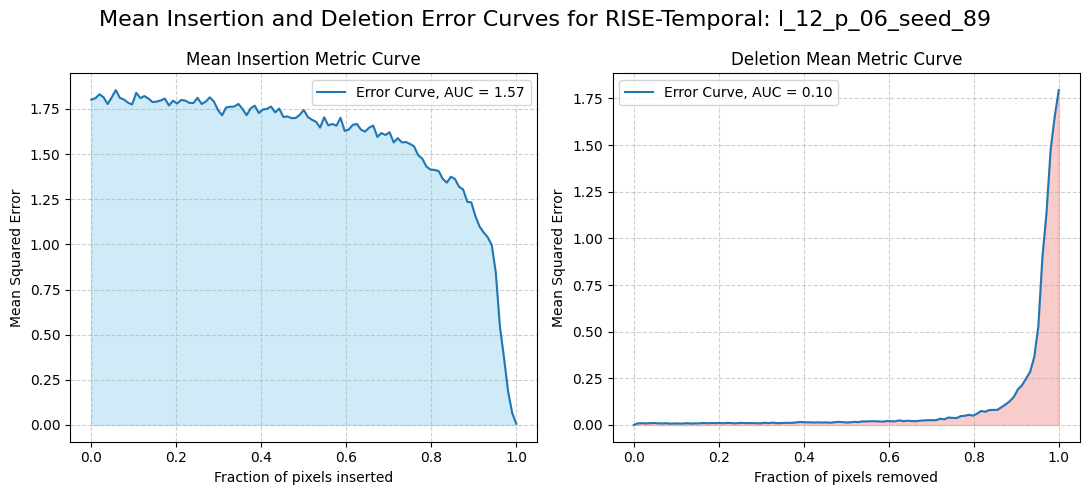

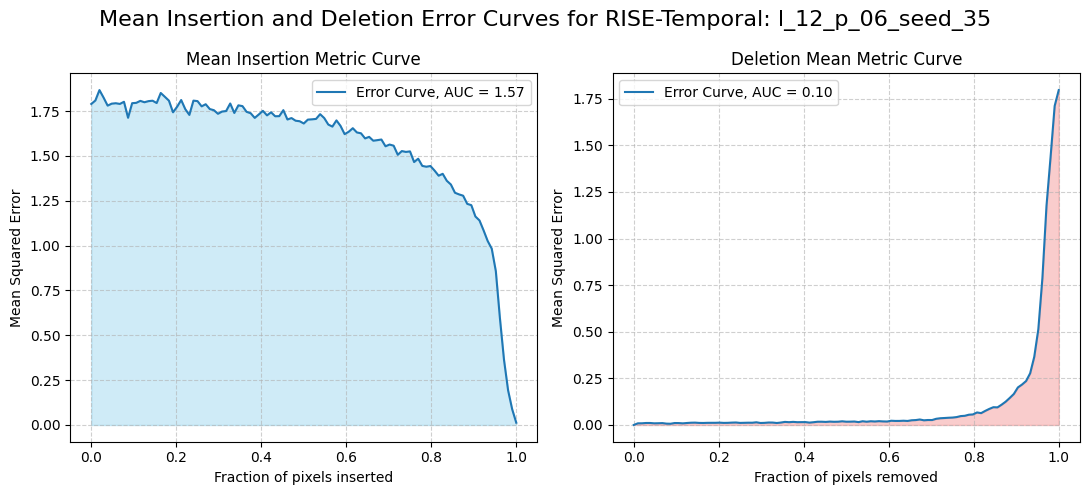

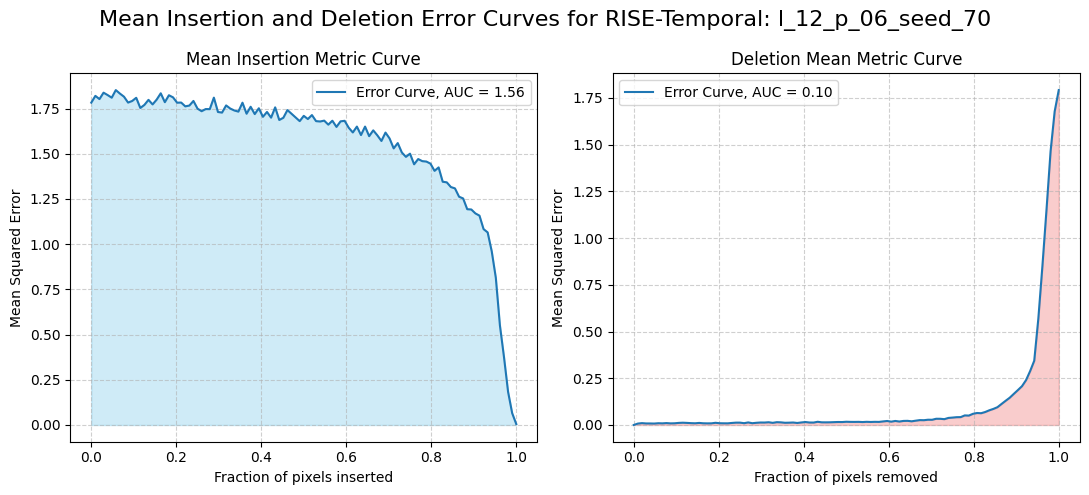

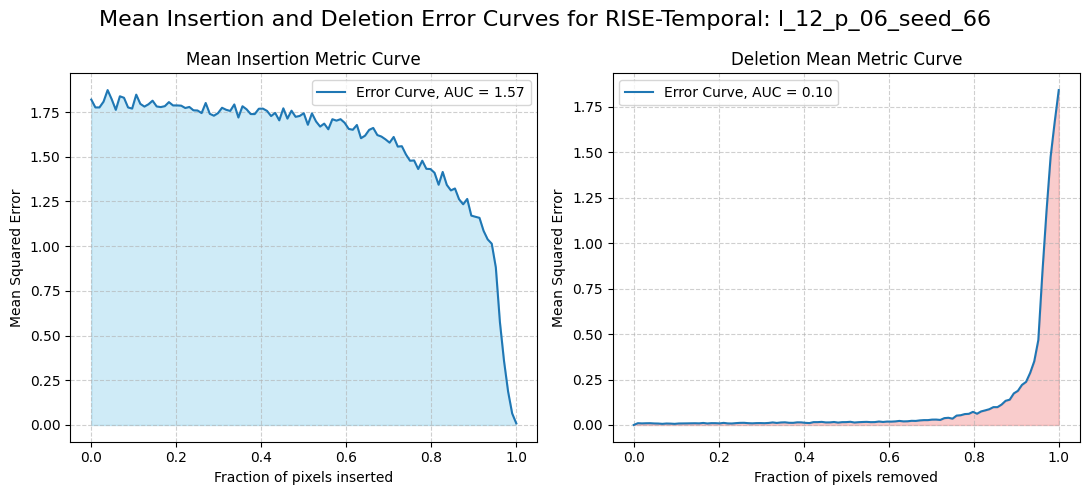

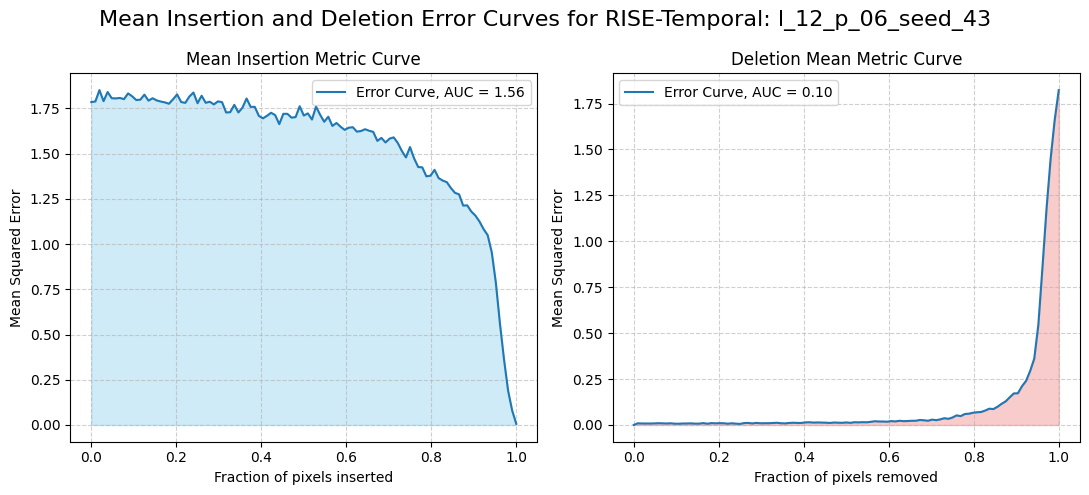

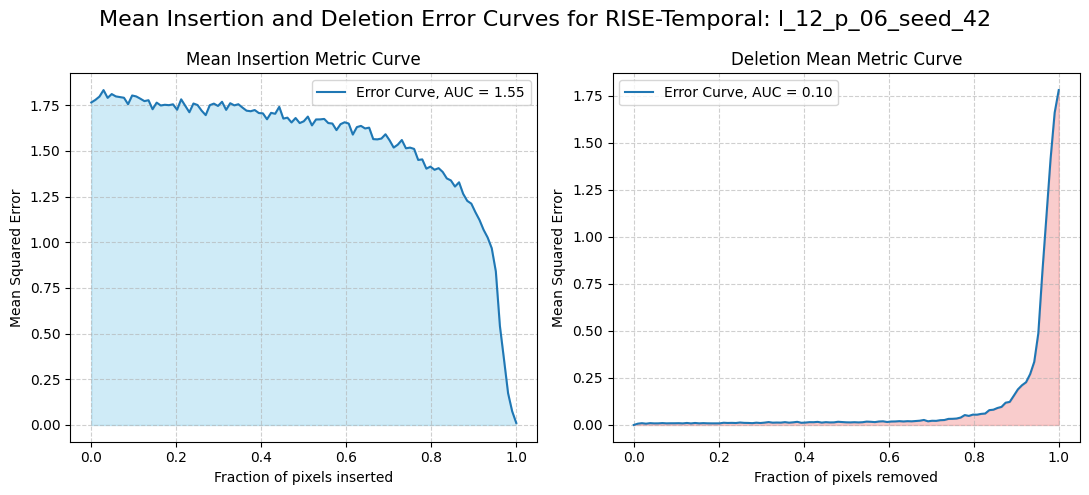

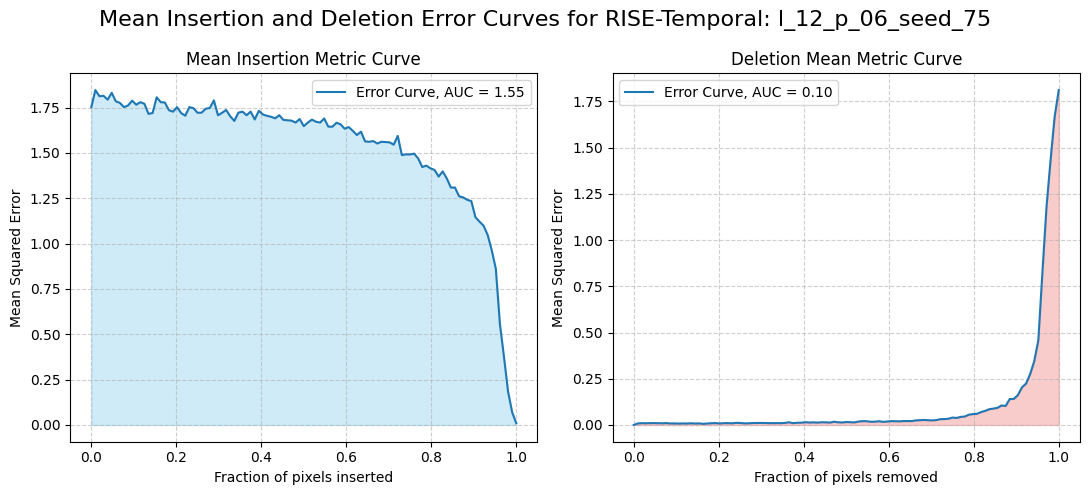

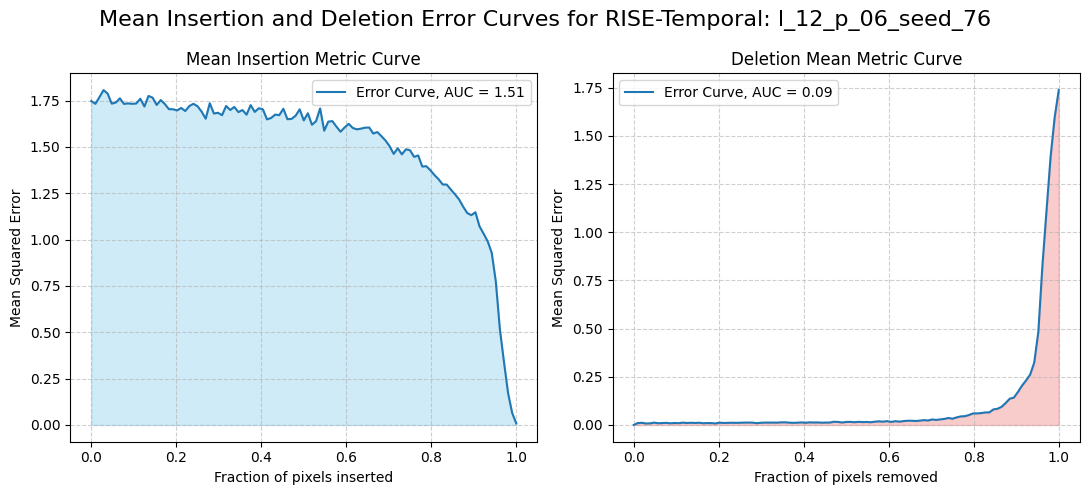

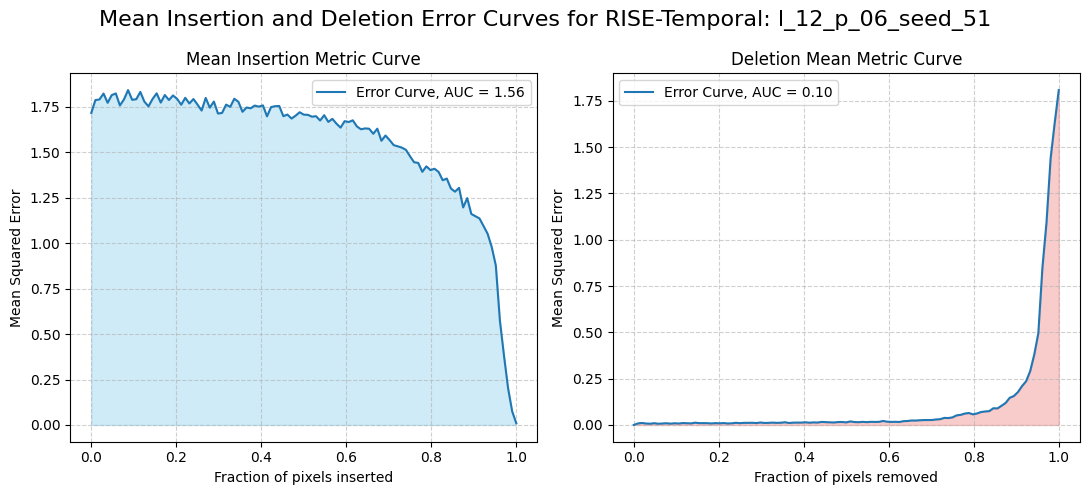

In [7]:

nr_alg = 0

all_mean_errors_insertion = []
all_mean_errors_deletion  = []

for result in results_stability_temporal[nr_alg]:
    param_comb = result["parameters_comb"]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion  = result["errors_deletion"]


    mean_errors_insertion,mean_errors_deletion, mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Temporal: {param_comb}")

    all_mean_errors_insertion.append(mean_errors_insertion)
    all_mean_errors_deletion.append(mean_errors_deletion)

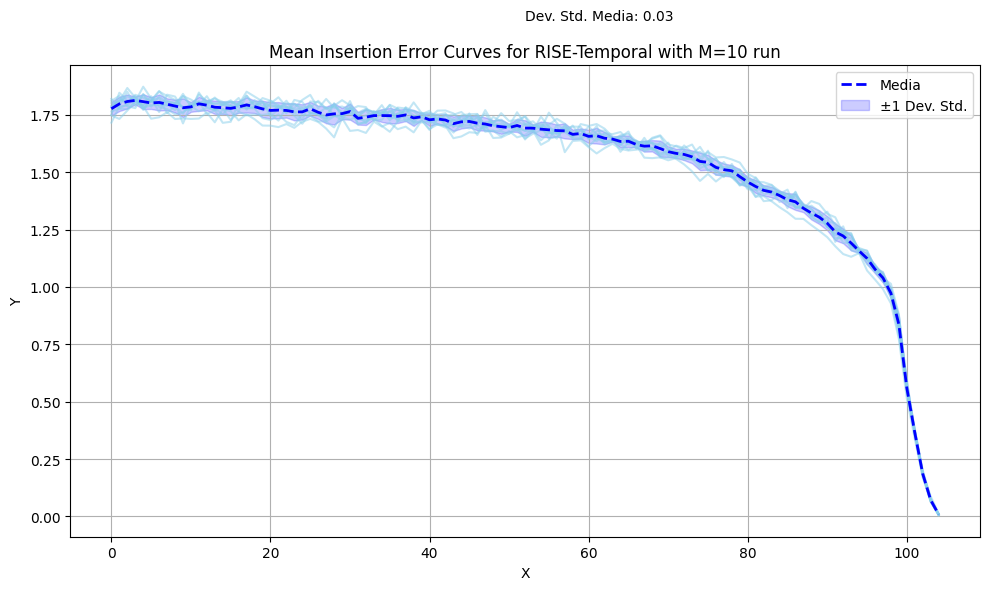

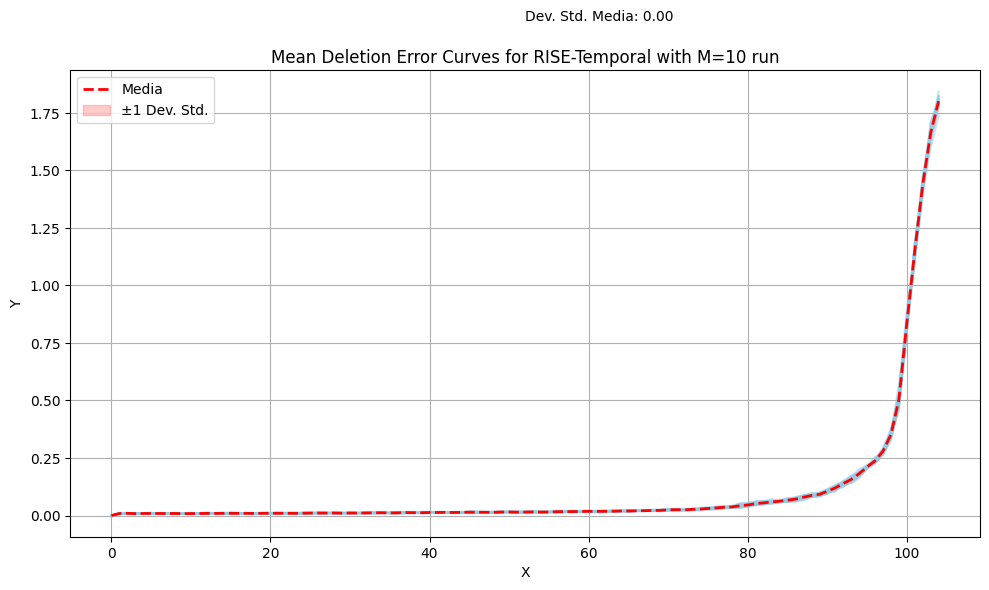

In [8]:
plot_curves_with_stats(all_mean_errors_insertion, title='Mean Insertion Error Curves for RISE-Temporal with M=10 run', color='blue')
plot_curves_with_stats(all_mean_errors_deletion, title='Mean Deletion Error Curves for RISE-Temporal with M=10 run', color='red')

### Exp_Kernel

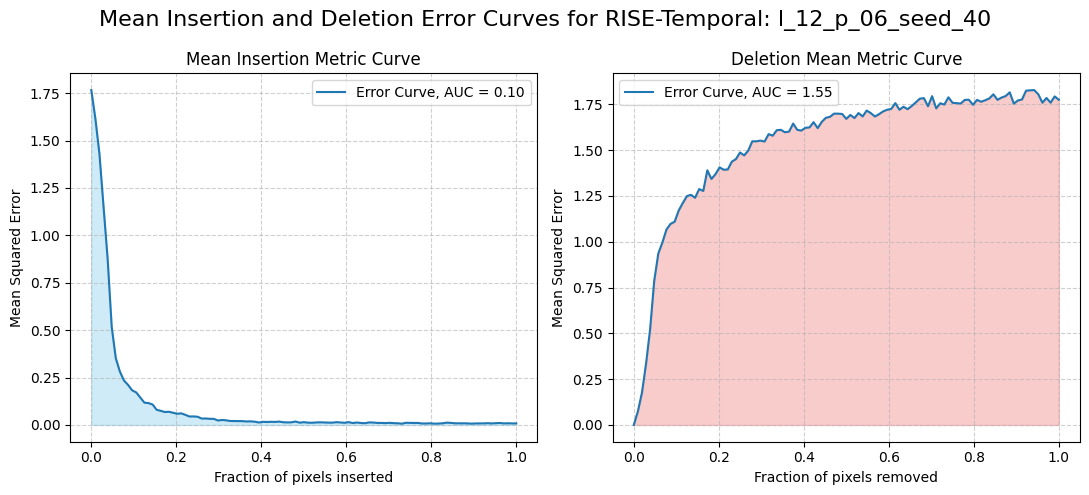

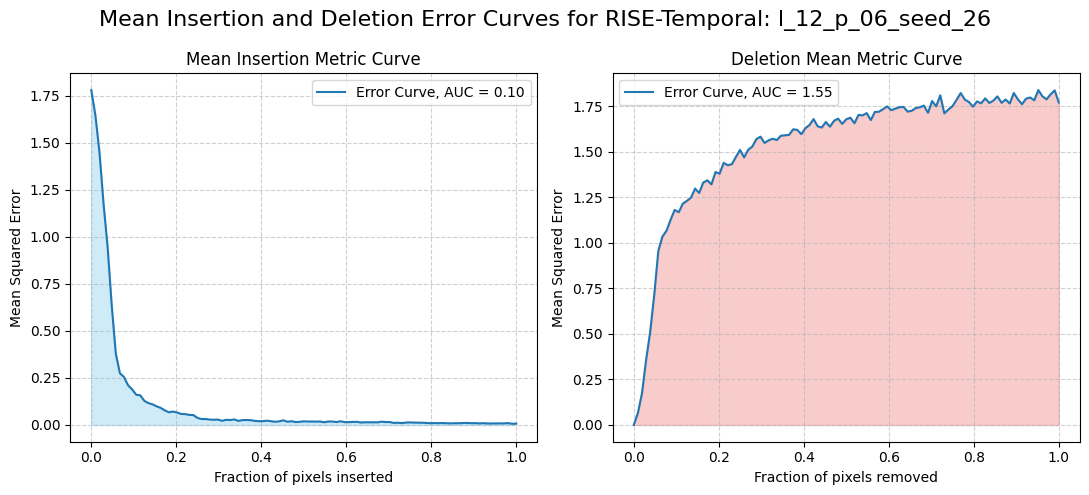

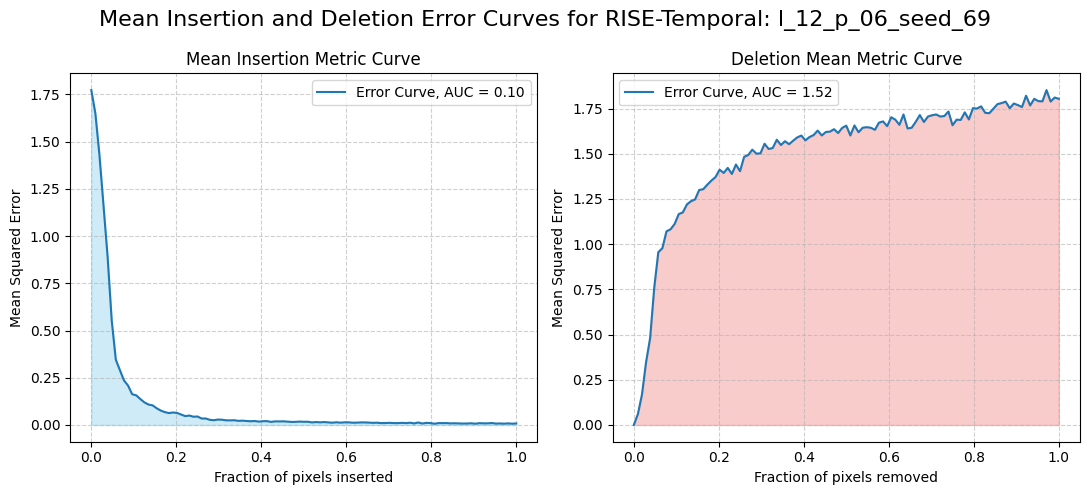

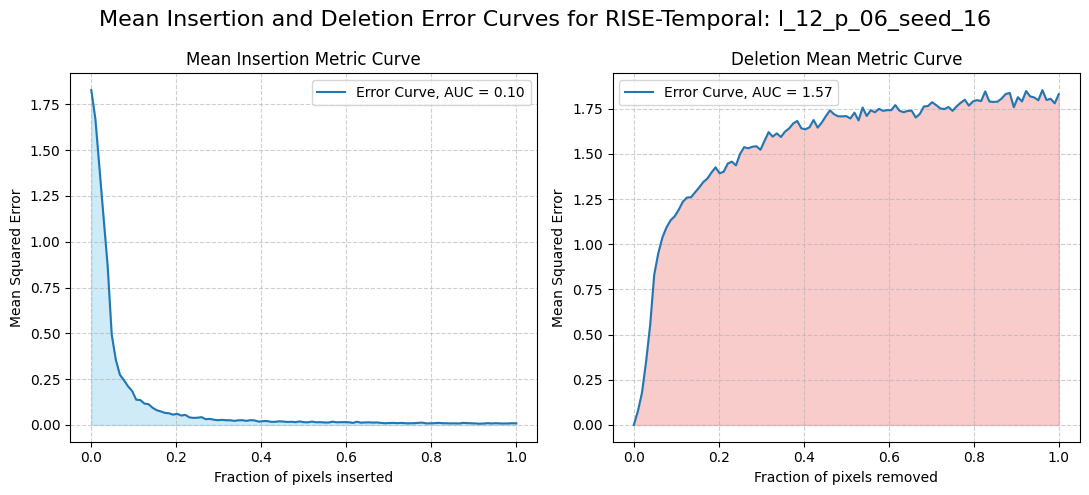

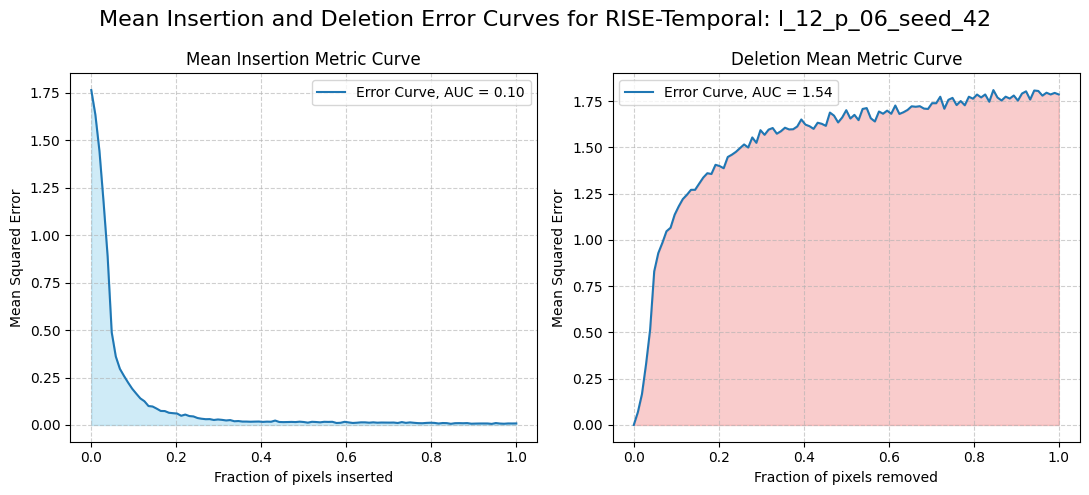

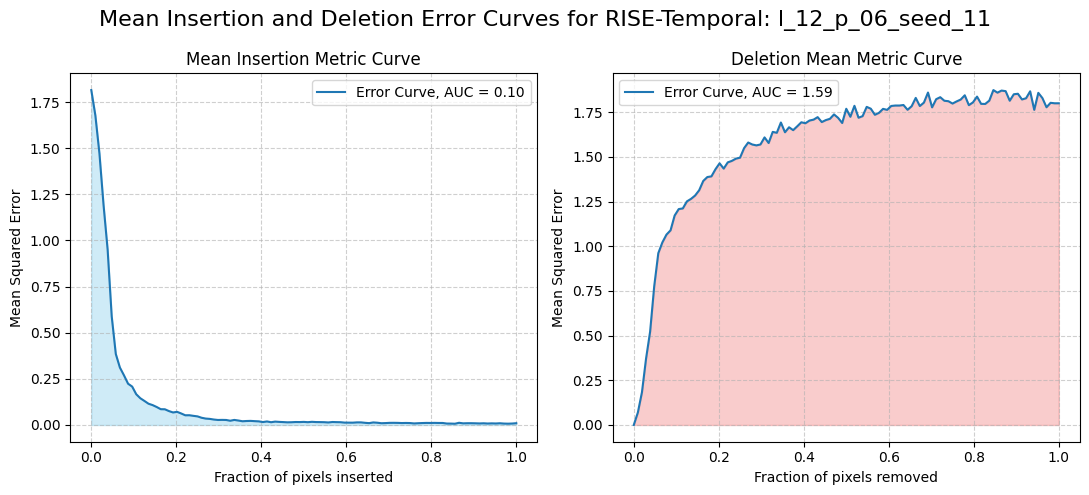

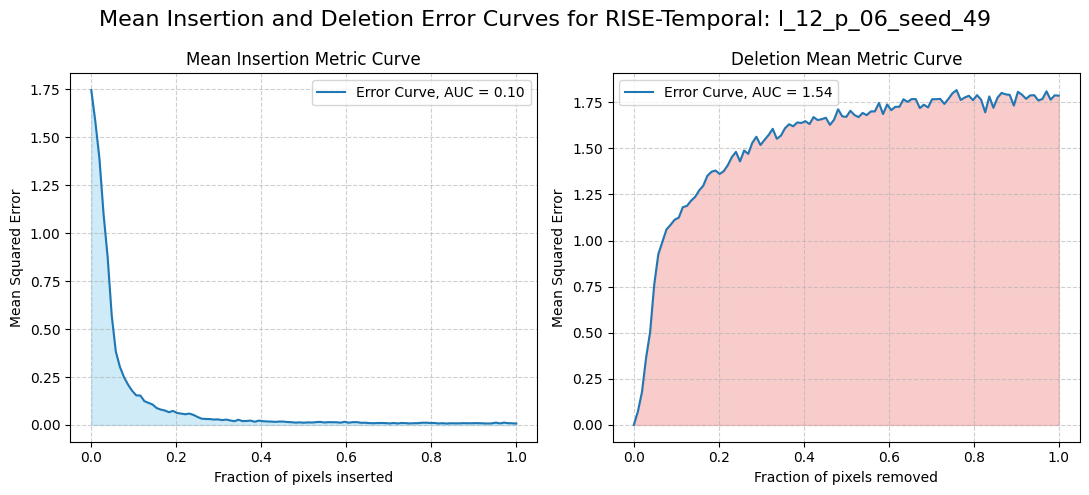

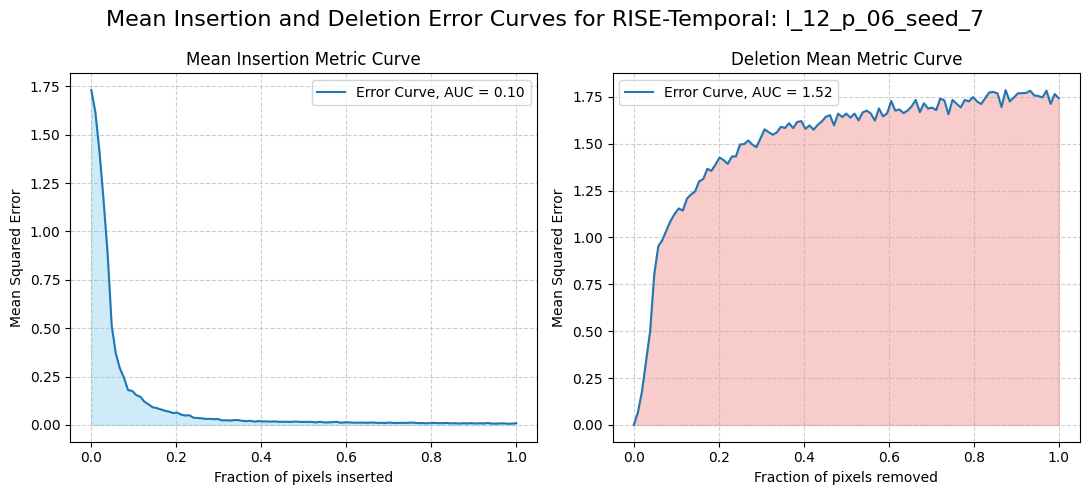

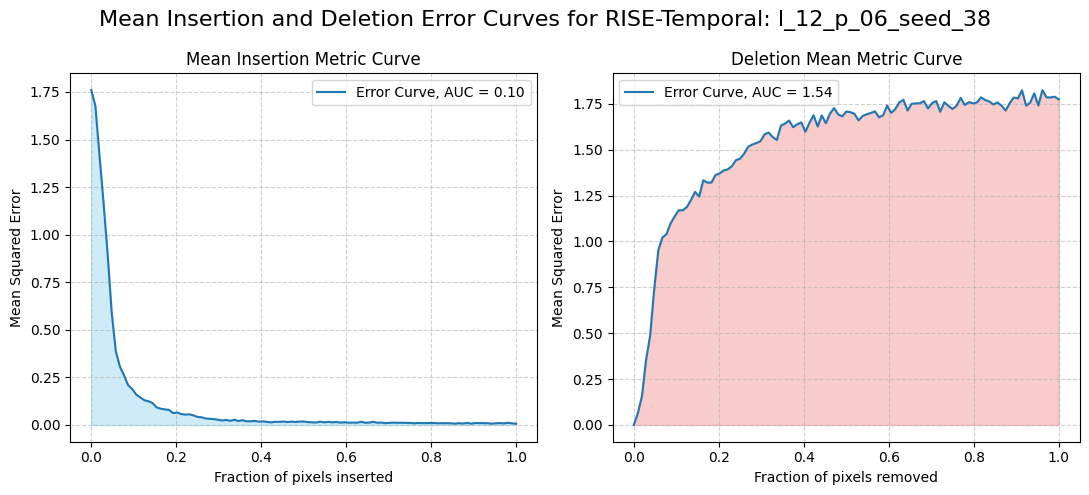

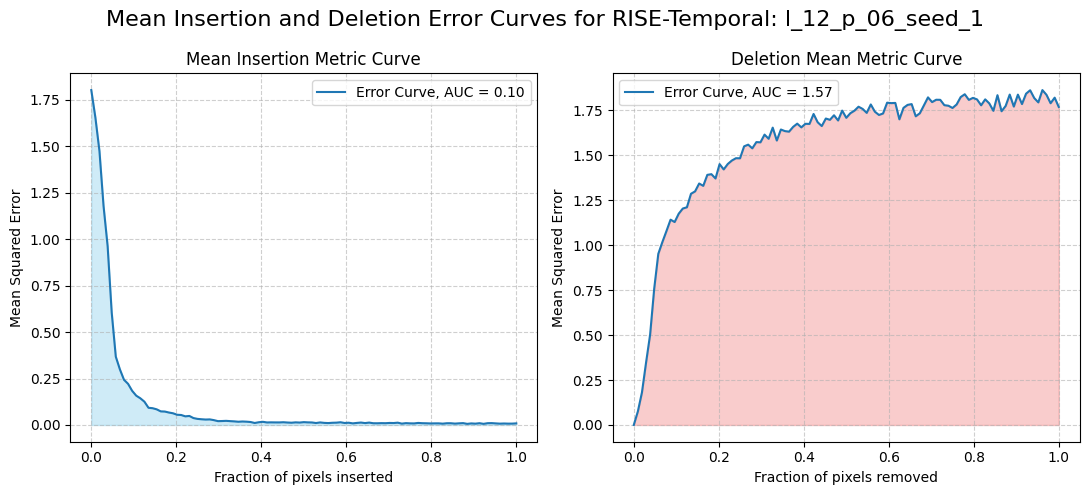

In [11]:
nr_alg = 1

all_mean_errors_insertion = []
all_mean_errors_deletion  = []

for result in results_stability_temporal[nr_alg]:
    param_comb = result["parameters_comb"]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion  = result["errors_deletion"]


    mean_errors_insertion,mean_errors_deletion, mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Temporal: {param_comb}")

    all_mean_errors_insertion.append(mean_errors_insertion)
    all_mean_errors_deletion.append(mean_errors_deletion)

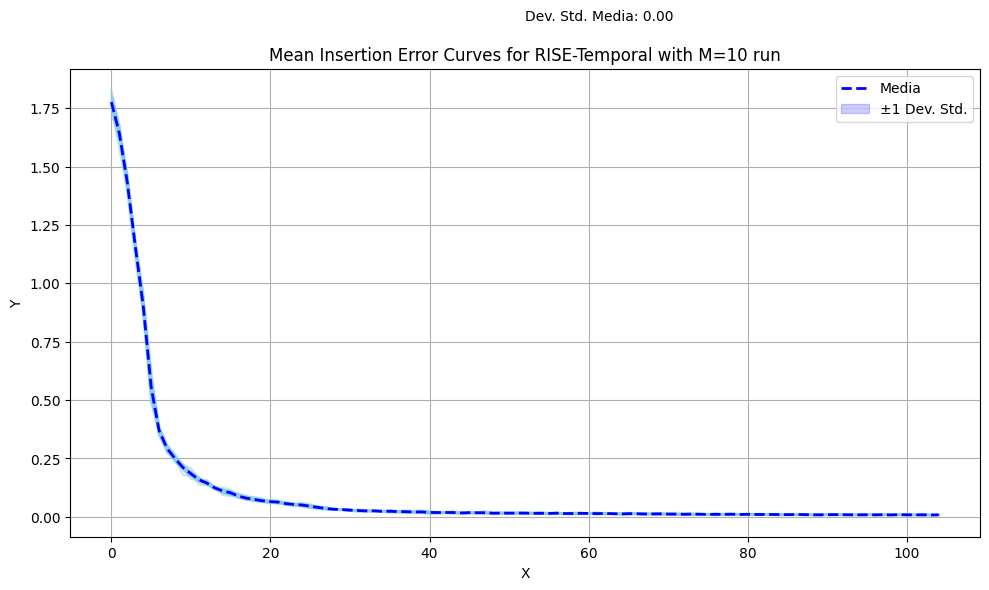

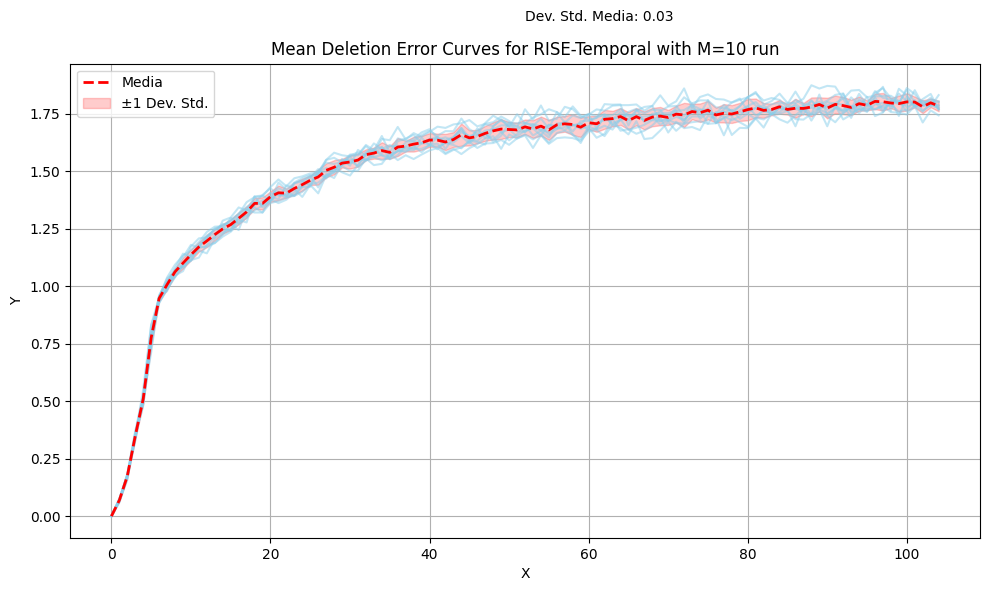

In [12]:
plot_curves_with_stats(all_mean_errors_insertion, title='Mean Insertion Error Curves for RISE-Temporal with M=10 run', color='blue')
plot_curves_with_stats(all_mean_errors_deletion, title='Mean Deletion Error Curves for RISE-Temporal with M=10 run', color='red')

### Inv_Sigmoide

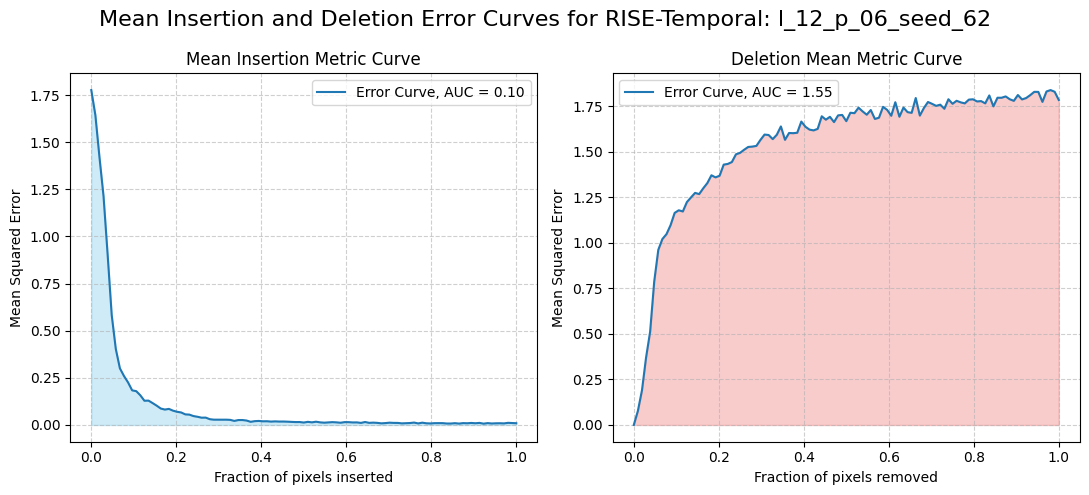

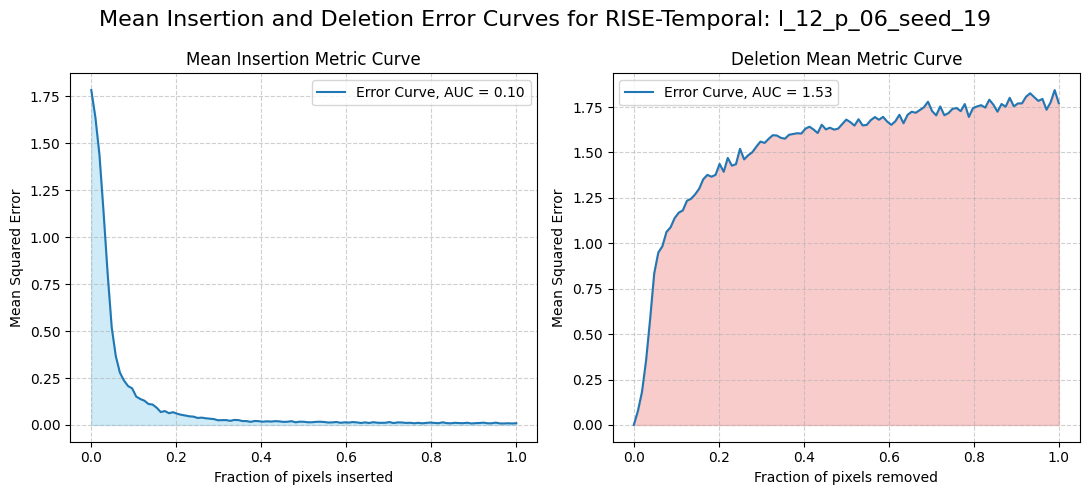

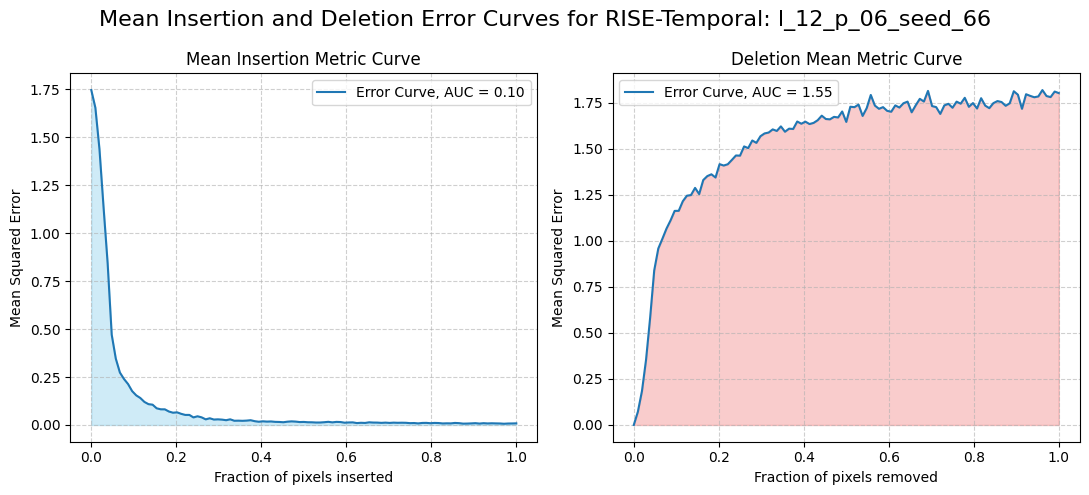

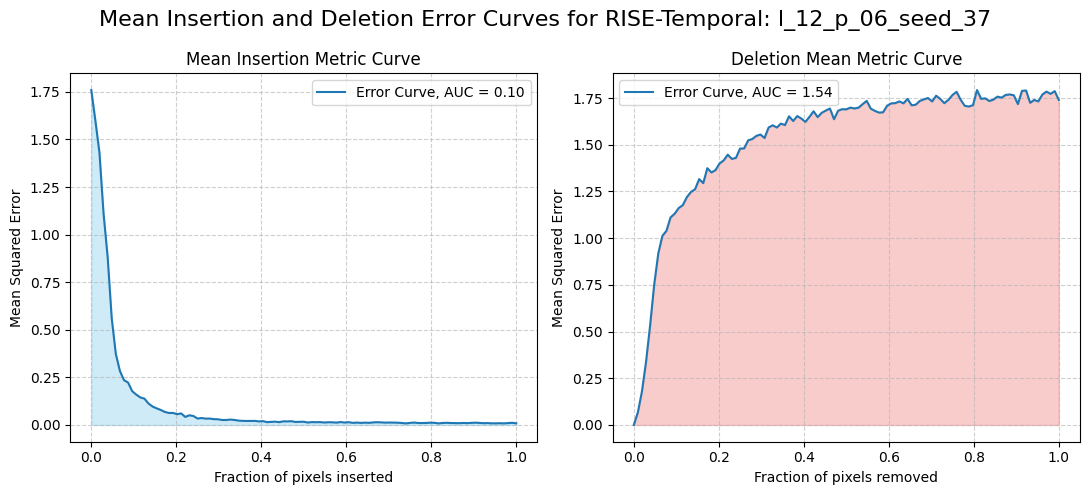

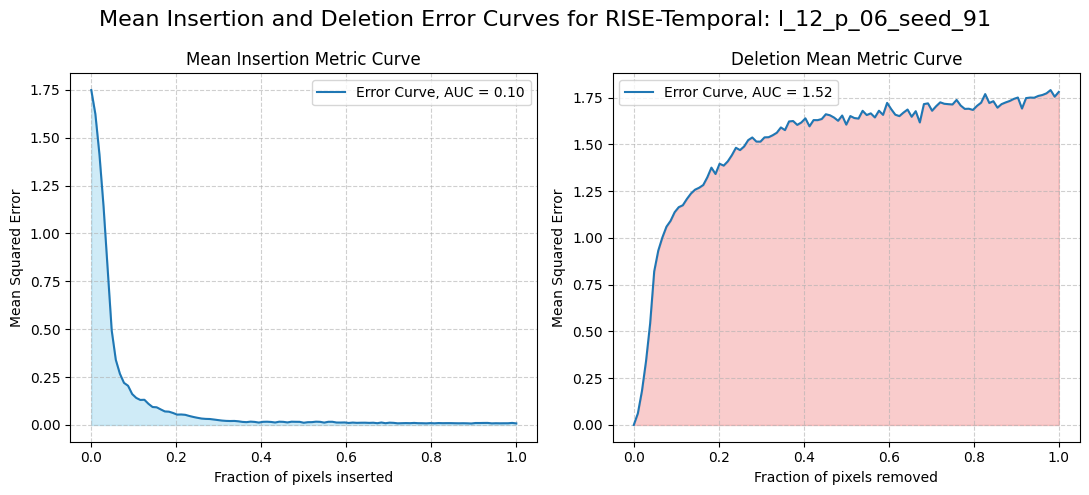

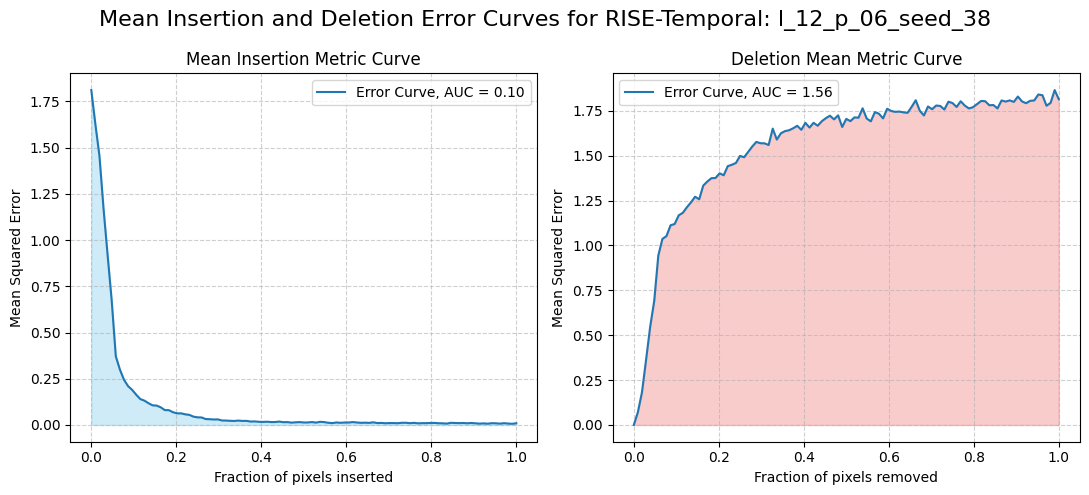

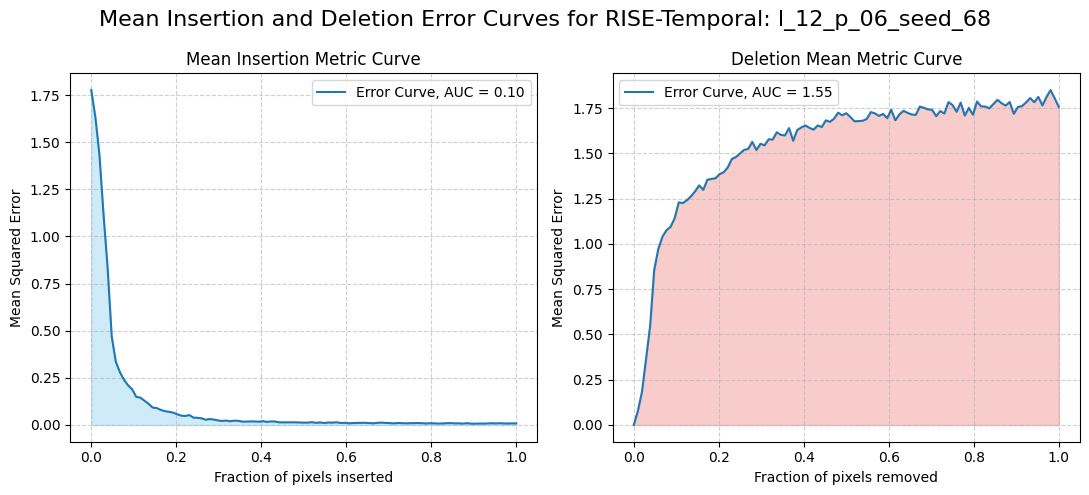

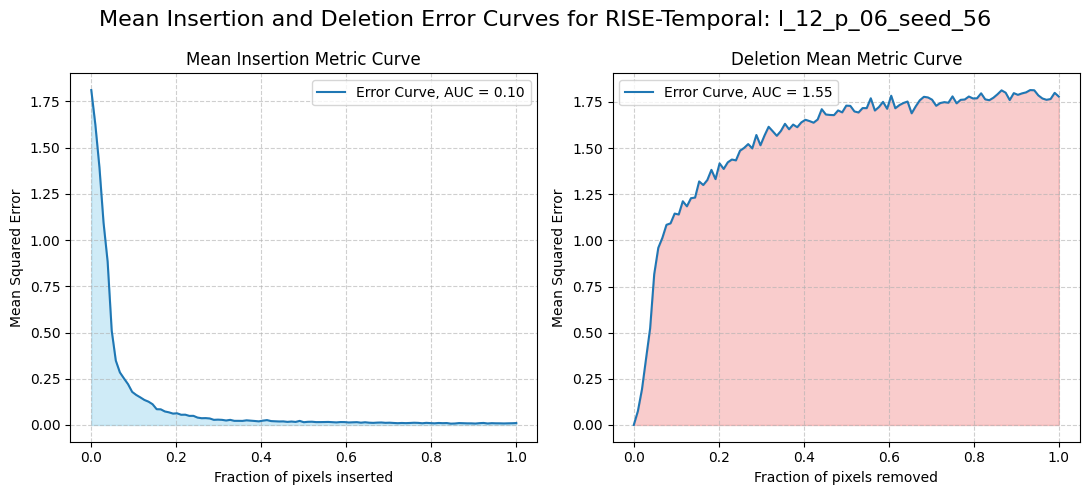

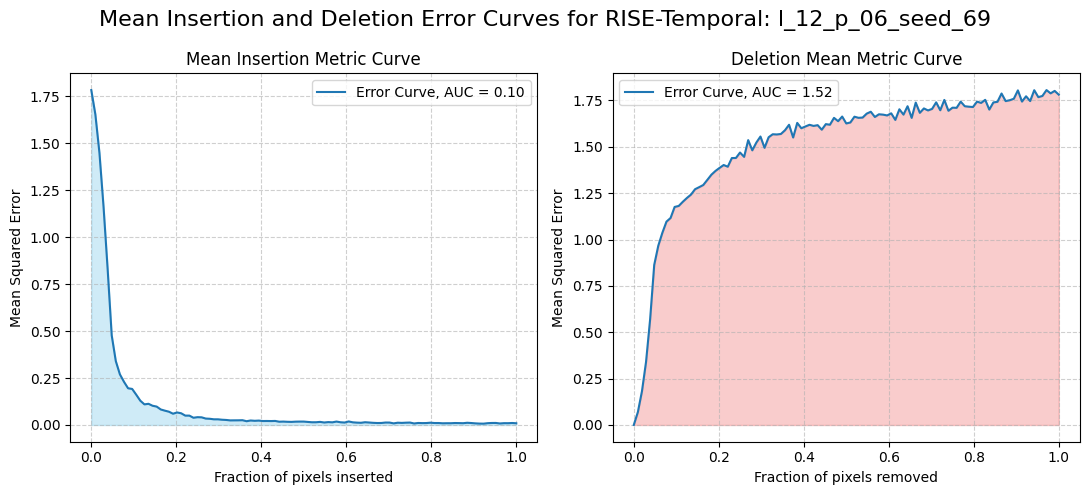

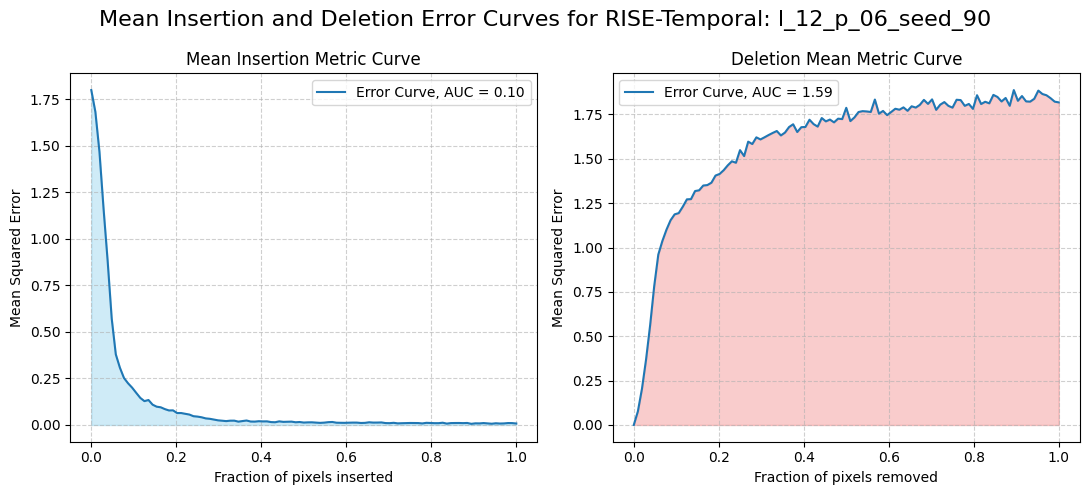

In [13]:
nr_alg = 2

all_mean_errors_insertion = []
all_mean_errors_deletion  = []

for result in results_stability_temporal[nr_alg]:
    param_comb = result["parameters_comb"]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion  = result["errors_deletion"]


    mean_errors_insertion,mean_errors_deletion, mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion,
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Temporal: {param_comb}")

    all_mean_errors_insertion.append(mean_errors_insertion)
    all_mean_errors_deletion.append(mean_errors_deletion)

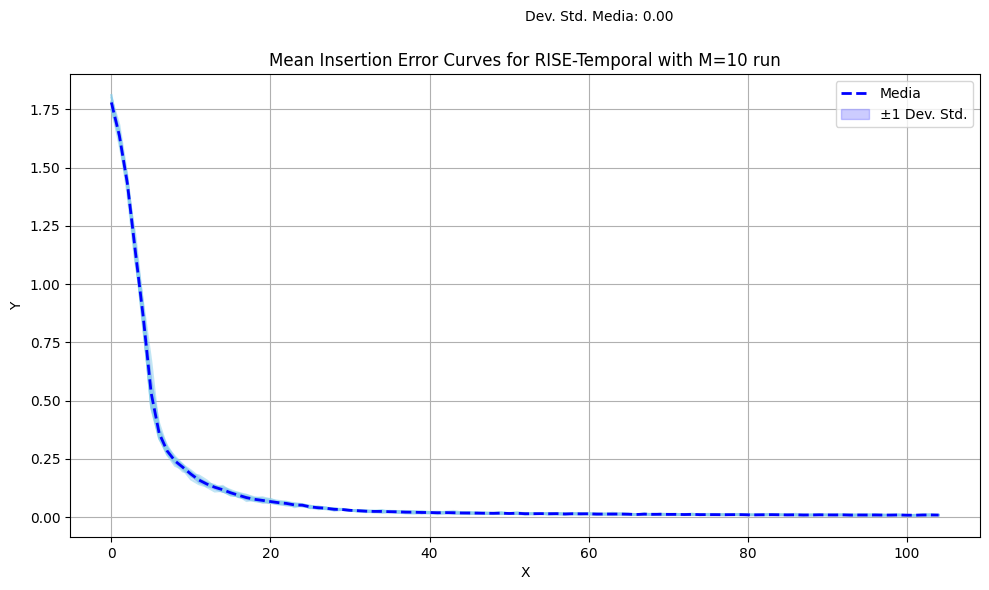

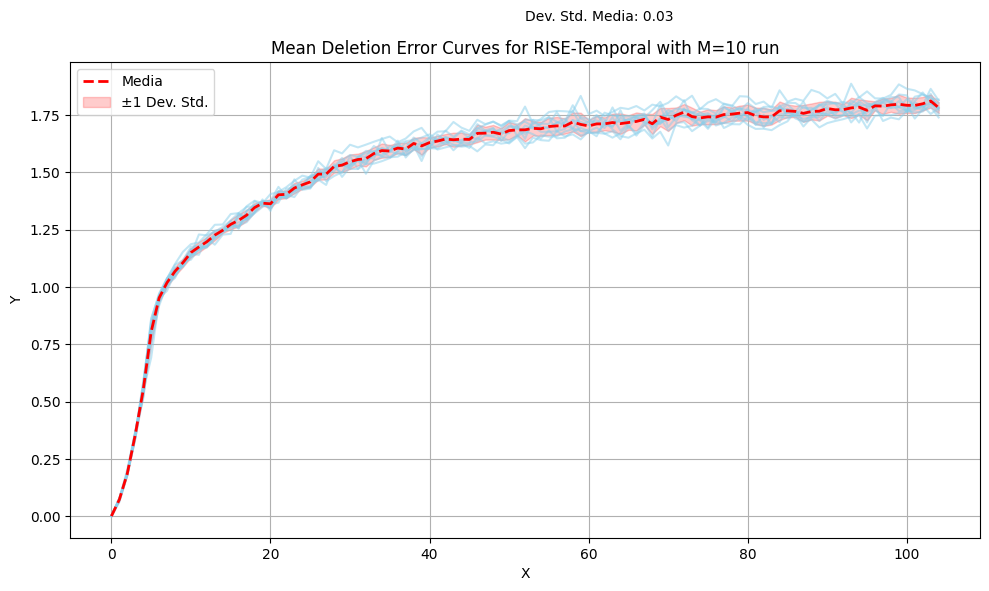

In [14]:
plot_curves_with_stats(all_mean_errors_insertion, title='Mean Insertion Error Curves for RISE-Temporal with M=10 run', color='blue')
plot_curves_with_stats(all_mean_errors_deletion, title='Mean Deletion Error Curves for RISE-Temporal with M=10 run', color='red')